<a href="https://colab.research.google.com/github/ednavivianasegura/AccesoImages/blob/main/ModelosNoSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025




# CURSO - PYTHON: PROGRAMACIóN DE IA

**Módulo: Aprendizaje no supervisado**

En el aprendizaje supervisado, el sistema aprende a partir de ejemplos etiquetados, es decir, datos donde ya conocemos la respuesta correcta. El objetivo es construir un modelo que prediga etiquetas para nuevos datos. Por ejemplo: clasificar correos como "spam" o "no spam" usando ejemplos previamente etiquetados.

En cambio, en el *aprendizaje no supervisado*, el sistema trabaja con datos sin etiquetas y busca patrones ocultos por sí mismo. Aquí no hay respuestas correctas de antemano; el algoritmo explora la estructura intrínseca de los datos. Un ejemplo típico es agrupar clientes con comportamientos similares sin conocer previamente las categorías.

<center>
 <img src="https://raw.githubusercontent.com/ednavivianasegura/AccesoImages/aaa31fdeb3eb3a27d54280be8b9e45614b9a634a/clustering_diferencias.png" alt="descriptiva" width="50%" height="50%">  
</center>
Imagen tomada de  [Unsupervised Learning with Python: A Beginner's Guide, Vihar Kurama](https://builtin.com/data-science/unsupervised-learning-python)




**Objetivos:**

- Encontrar estructuras ocultas en los datos.

- Agrupar datos similares (clustering).

- Reducir la dimensionalidad para visualización o eficiencia.

**Aplicaciones:** Segmentación de clientes, detección de anomalías, compresión de imágenes, etc.



## Clustering

El clustering (o agrupamiento) es una técnica de aprendizaje no supervisado cuyo objetivo es dividir un conjunto de datos en grupos homogéneos (llamados clusters), de tal manera que:

* Intra-cluster: Los puntos dentro de un mismo cluster sean similares entre sí (minimizar varianza interna).

* Inter-cluster: Los puntos de clusters distintos sean diferentes (maximizar distancia entre clusters).

## Tipos de Clustering

Existen dos enfoques principales, diferenciados por su estructura y forma de asignar clusters:

### Clustering Jerárquico

Construye una jerarquía de clusters representada como un árbol (dendrograma), donde cada nodo es una fusión o división de clusters.

**Subtipos:**

* Agglomerativo (bottom-up): Cada punto inicia como un cluster y se fusionan iterativamente.

* Divisivo (top-down): Todos los puntos inician en un cluster y se dividen recursivamente.

**Ventaja:** No requiere especificar el número de clusters a priori.

### Clustering No Jerárquico

Asigna puntos a clusters directamente, sin estructura jerárquica. Los clusters son planos y definitivos.

**Algoritmos comunes:**

* K-means: Minimiza la varianza intra-cluster.

* DBSCAN: Basado en densidad y detección de outliers.

**Ventaja:** Computacionalmente eficiente para grandes conjuntos de datos.


In [4]:
# @title Librerías ecesarias


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


1. **Cluster jerárquico o aglomerativo:**

Imaginemos que somos nutricionistas investigando la relación entre peso y estatura en un grupo de pacientes. Contamos con datos de 200 personas (peso en kg y estatura en cm), pero no tenemos información previa sobre categorías como *bajo peso*, *peso normal* o *sobrepeso*. Nuestro objetivo es descubrir si existen grupos naturales en estos datos que nos permitan identificar patrones relevantes para personalizar planes alimenticios."


Supongamos que los datos provienen de chequeos médicos rutinarios en una clínica de nutrición durante el último año. Cada registro contiene:

* Peso (kg): Variable numérica continua

* Estatura (cm): Variable numérica continua

Actualmente, la clínica clasifica manualmente a los pacientes en tres categorías de peso según tablas de IMC, pero sospechamos que podrían existir subgrupos más específicos que requieran intervenciones diferenciadas.

* Utilizaremos clustering jerárquico para identificar grupos naturales sin imponer categorías preconcebidas

* Visualizar cómo se relacionan las observaciones

* Determinar si las agrupaciones coinciden con las categorías tradicionales de IMC"



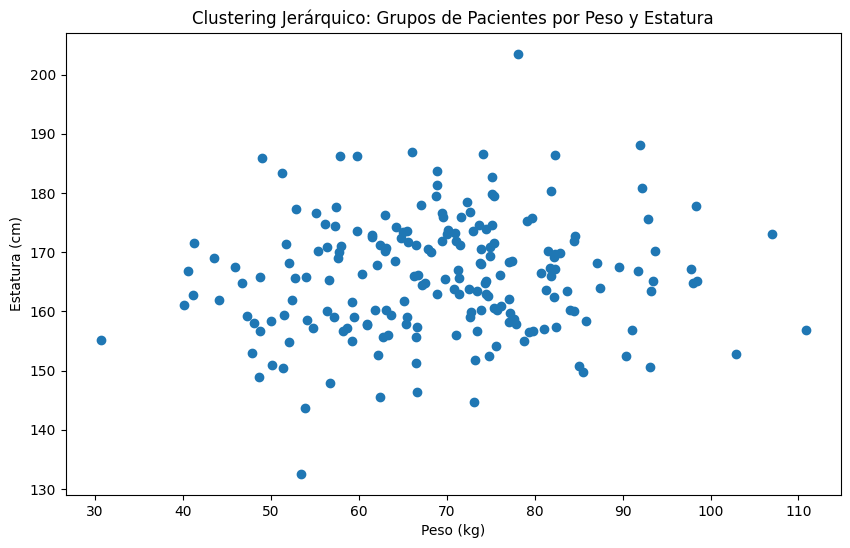

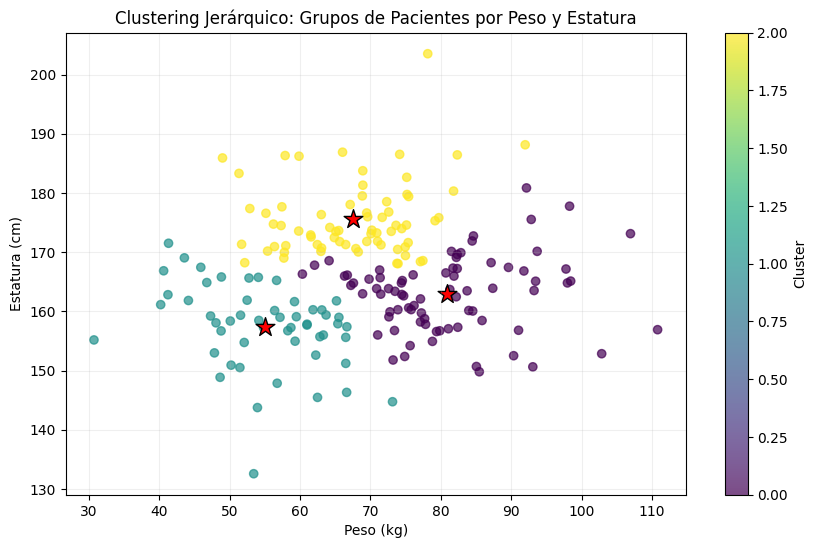

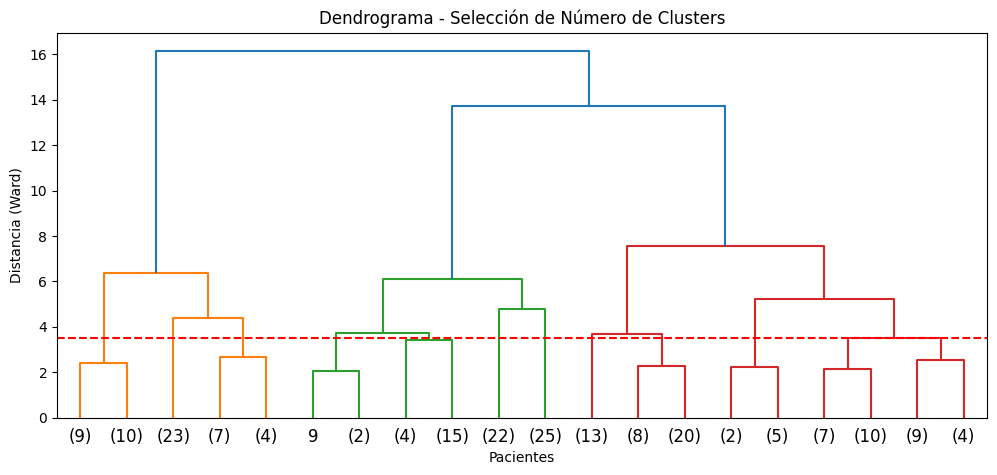

              Peso               Estatura          
              mean        std        mean       std
Cluster                                            
0        80.860876  10.278954  162.965626  6.281787
1        54.965663   8.709041  157.418499  7.077869
2        67.497951   8.738286  175.612132  6.359663


In [11]:
# Datos simulados (peso en kg y estatura en cm)
np.random.seed(42)
pesos = np.random.normal(loc=70, scale=15, size=200)  # 200 valores centrados en 70 kg
estaturas = np.random.normal(loc=165, scale=10, size=200)  # 200 valores centrados en 165 cm


# Combinar en una matriz y escalar (importante para clustering jerárquico)
X = np.column_stack((pesos, estaturas))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Estandarizar para que ambas variables tengan igual peso


#graficamos los datos originales
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Clustering Jerárquico: Grupos de Pacientes por Peso y Estatura')





# ----------- #

# Configurar modelo
cluster_jerarquico = AgglomerativeClustering(
    n_clusters=3,            # Número de clusters (ajustable)
    metric='euclidean',       # Métrica de distancia
    linkage='ward'           # Criterio de fusión (minimiza varianza intra-cluster)
)

# Aplicar a los datos
etiquetas = cluster_jerarquico.fit_predict(X_scaled)


# ----------- #

# Graficar clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', alpha=0.7)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Clustering Jerárquico: Grupos de Pacientes por Peso y Estatura')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.2)

# Añadir centroides (opcional)
for cluster_id in np.unique(etiquetas):
    centroide = X[etiquetas == cluster_id].mean(axis=0)
    plt.scatter(centroide[0], centroide[1], marker='*', s=200, c='red', edgecolor='black')
plt.show()


# ----------- #


# Calcular linkage matrix
Z = linkage(X_scaled, method='ward')

# Plotear dendrograma
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.axhline(y=3.5, color='r', linestyle='--')  # Línea para sugerir 3 clusters
plt.title('Dendrograma - Selección de Número de Clusters')
plt.xlabel('Pacientes')
plt.ylabel('Distancia (Ward)')
plt.show()

# Estadísticas por cluster
import pandas as pd
df = pd.DataFrame(X, columns=['Peso', 'Estatura'])
df['Cluster'] = etiquetas

print(df.groupby('Cluster').agg({
    'Peso': ['mean', 'std'],
    'Estatura': ['mean', 'std']
}))


GENERACIÓN Y PREPARACIÓN DE DATOS


VISUALIZACIÓN INICIAL DE DATOS



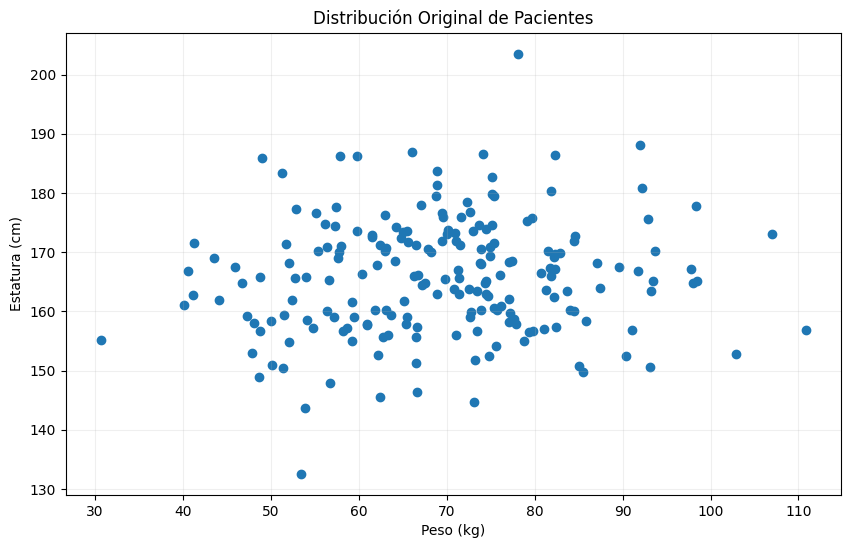


CLUSTERING JERÁRQUICO (AGGLOMERATIVE)


VISUALIZACIÓN DE RESULTADOS



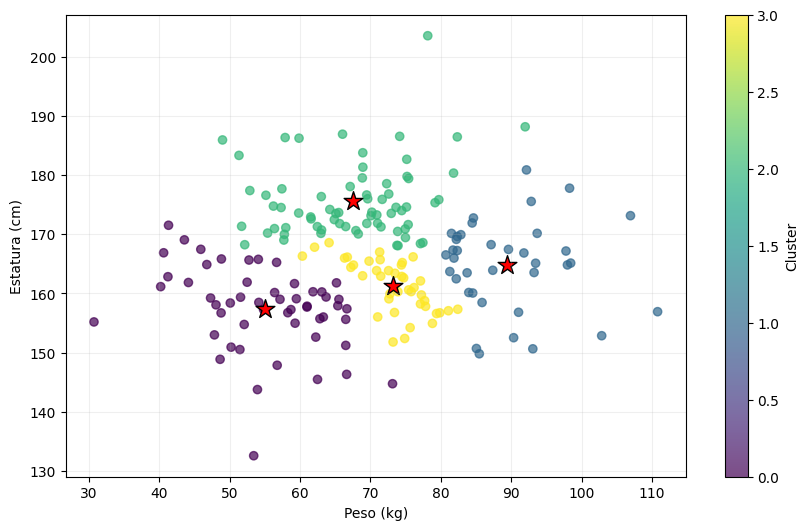


DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)



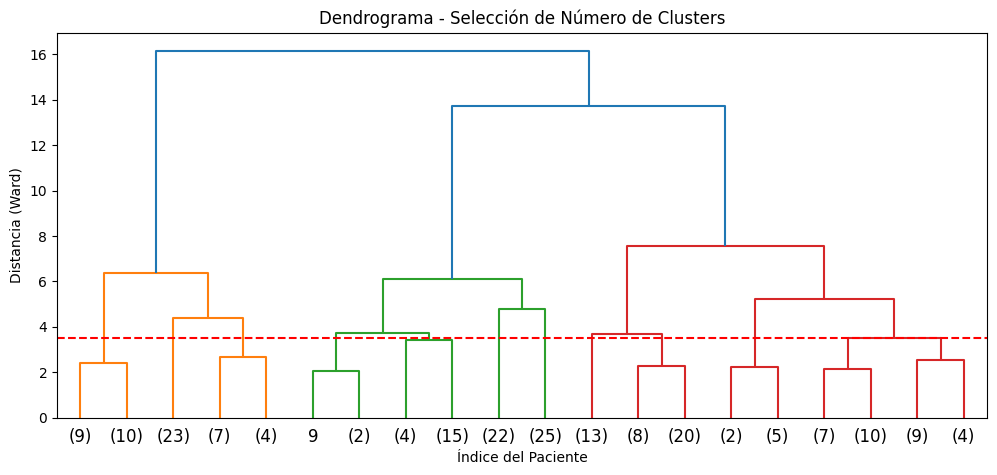


ANÁLISIS ESTADÍSTICO POR CLUSTER

              Peso              Estatura          
              mean       std        mean       std
Cluster                                           
0        54.965663  8.709041  157.418499  7.077869
1        89.340801  7.635748  164.830352  7.515524
2        67.497951  8.738286  175.612132  6.359663
3        73.208260  4.936881  161.282824  4.359851


In [20]:
# =============================================
# 1. GENERACIÓN Y PREPARACIÓN DE DATOS
# =============================================

print()
print('GENERACIÓN Y PREPARACIÓN DE DATOS')
print()

# Semilla para reproducibilidad
np.random.seed(42)  # Fija la semilla aleatoria para que los resultados sean consistentes

# Datos simulados de peso (kg) y estatura (cm)
pesos = np.random.normal(
    loc=70,    # Media de la distribución normal (70 kg)
    scale=15,   # Desviación estándar (dispersión de 15 kg)
    size=200    # 200 muestras
)

estaturas = np.random.normal(
    loc=165,    # Media de 165 cm
    scale=10,    # Desviación estándar de 10 cm
    size=200     # 200 muestras
)

# Combinar las dos variables en una matriz de 200x2
X = np.column_stack((pesos, estaturas))  # Cada fila es un paciente, columnas: [peso, estatura]

# Escalado de datos (normalización)
scaler = StandardScaler()  # Crea un objeto para estandarizar (media=0, desviación=1)
X_scaled = scaler.fit_transform(X)  # Aplica la transformación a los datos

# =============================================
# 2. VISUALIZACIÓN INICIAL DE DATOS
# =============================================

print()
print('VISUALIZACIÓN INICIAL DE DATOS')
print()

plt.figure(figsize=(10, 6))
plt.scatter(
    X[:, 0],  # Eje X: pesos
    X[:, 1],  # Eje Y: estaturas
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Distribución Original de Pacientes')
plt.grid(True, alpha=0.2)
plt.show()

# =============================================
# 3. CLUSTERING JERÁRQUICO (AGGLOMERATIVE)
# =============================================

print()
print('CLUSTERING JERÁRQUICO (AGGLOMERATIVE)')
print()

# Configuración del modelo
cluster_jerarquico = AgglomerativeClustering(
    n_clusters=3,       # Número final de clusters a obtener
    metric='euclidean',  # Métrica de distancia entre puntos (distancia euclidiana)
    linkage='ward'       # Criterio para fusionar clusters:
    # linkage='ward': Minimiza la varianza de los clusters que se fusionan, produciendo clusters más compactos.
    # Alternativas comunes:
    #'complete': Usa la distancia máxima entre puntos.
    #'average': Usa la distancia promedio.
)

# Aplicar el clustering a los datos escalados
etiquetas = cluster_jerarquico.fit_predict(X_scaled)  # Retorna un array con las etiquetas de cluster (0, 1, 2)

# =============================================
# 4. VISUALIZACIÓN DE RESULTADOS
# =============================================

print()
print('VISUALIZACIÓN DE RESULTADOS')
print()

plt.figure(figsize=(10, 6))
# Graficar puntos coloreados por cluster
plt.scatter(
    X[:, 0],           # Peso en kg (eje X)
    X[:, 1],           # Estatura en cm (eje Y)
    c=etiquetas,       # Color según etiqueta de cluster
    cmap='viridis',    # Mapa de colores
    alpha=0.7          # Transparencia para mejor visualización
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.colorbar(label='Cluster')  # Barra lateral que indica el mapeo de colores
plt.grid(True, alpha=0.2)

# Calcular y graficar centroides
for cluster_id in np.unique(etiquetas):
    centroide = X[etiquetas == cluster_id].mean(axis=0)  # Calcula la media de cada variable por cluster
    plt.scatter(
        centroide[0],          # Peso promedio del cluster
        centroide[1],          # Estatura promedio del cluster
        marker='*',            # Forma de estrella para el centroide
        s=200,                 # Tamaño del marcador
        c='red',               # Color rojo
        edgecolor='black'      # Borde negro para mejor contraste
    )
plt.show()

# =============================================
# 5. DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)
# =============================================

print()
print('DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)')
print()

# Calcular la matriz de linkage (pasos de fusión)
Z = linkage(
    X_scaled,          # Datos escalados
    method='ward'      # Mismo método que en el clustering
)

# Configurar el dendrograma
plt.figure(figsize=(12, 5))
dendrogram(
    Z,                          # Matriz de linkage
    truncate_mode='lastp',      # Mostrar solo los últimos p clusters fusionados
    p=20,                      # Número de clusters mostrados
    show_leaf_counts=True       # Mostrar conteo de hojas en cada rama
)
# Línea horizontal para sugerir número de clusters
plt.axhline(
    y=3.5,                     # Altura donde cortar el dendrograma
    color='r',                 # Color rojo
    linestyle='--'             # Línea discontinua
)
plt.title('Dendrograma - Selección de Número de Clusters')
plt.xlabel('Índice del Paciente')
plt.ylabel('Distancia (Ward)')  # Distancia entre clusters fusionados
plt.show()

# =============================================
# 6. ANÁLISIS ESTADÍSTICO POR CLUSTER
# =============================================

print()
print('ANÁLISIS ESTADÍSTICO POR CLUSTER')
print()

# Convertir a DataFrame para análisis
df = pd.DataFrame(X, columns=['Peso', 'Estatura'])
df['Cluster'] = etiquetas  # Añadir columna de clusters

# Estadísticas descriptivas por cluster
print(df.groupby('Cluster').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std']   # Media y desviación estándar de la estatura
}))


2. **Cluster no jerárquico: K-Means**

**Objetivo:** Dividir datos en k grupos (clusters) donde cada punto pertenece al grupo con la media (centroide) más cercana.

**Pasos:**

* Seleccionar k centroides aleatorios.

* Asignar cada punto al centroide más cercano.

* Recalcular los centroides.

* Repetir hasta convergencia.

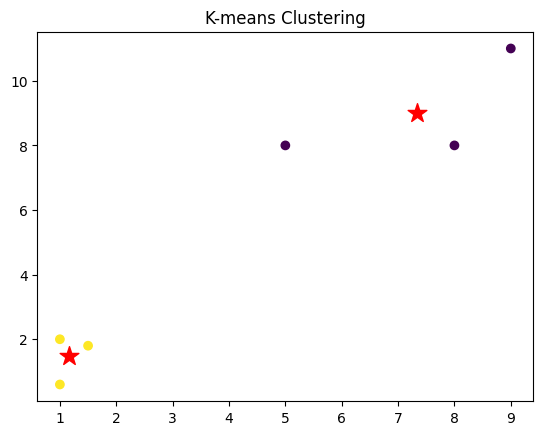

In [1]:
# Datos de ejemplo
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Crear modelo K-means (k=2)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Obtener clusters y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.title("K-means Clustering")
plt.show()